<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Dummy-Classifiers" data-toc-modified-id="Dummy-Classifiers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dummy Classifiers</a></span></li><li><span><a href="#Confusion-matrices" data-toc-modified-id="Confusion-matrices-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Confusion matrices</a></span><ul class="toc-item"><li><span><a href="#Binary-(two-class)-confusion-matrix" data-toc-modified-id="Binary-(two-class)-confusion-matrix-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Binary (two-class) confusion matrix</a></span></li></ul></li><li><span><a href="#Evaluation-metrics-for-binary-classification" data-toc-modified-id="Evaluation-metrics-for-binary-classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation metrics for binary classification</a></span></li><li><span><a href="#Decision-functions" data-toc-modified-id="Decision-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Decision functions</a></span></li><li><span><a href="#Precision-recall-curves" data-toc-modified-id="Precision-recall-curves-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Precision-recall curves</a></span></li><li><span><a href="#ROC-curves,-Area-Under-Curve-(AUC)" data-toc-modified-id="ROC-curves,-Area-Under-Curve-(AUC)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ROC curves, Area-Under-Curve (AUC)</a></span></li><li><span><a href="#Evaluation-measures-for-multi-class-classification" data-toc-modified-id="Evaluation-measures-for-multi-class-classification-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluation measures for multi-class classification</a></span><ul class="toc-item"><li><span><a href="#Multi-class-confusion-matrix" data-toc-modified-id="Multi-class-confusion-matrix-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Multi-class confusion matrix</a></span></li><li><span><a href="#Multi-class-classification-report" data-toc-modified-id="Multi-class-classification-report-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Multi-class classification report</a></span></li><li><span><a href="#Micro--vs.-macro-averaged-metrics" data-toc-modified-id="Micro--vs.-macro-averaged-metrics-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Micro- vs. macro-averaged metrics</a></span></li></ul></li><li><span><a href="#Regression-evaluation-metrics" data-toc-modified-id="Regression-evaluation-metrics-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Regression evaluation metrics</a></span></li><li><span><a href="#Model-selection-using-evaluation-metrics" data-toc-modified-id="Model-selection-using-evaluation-metrics-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model selection using evaluation metrics</a></span><ul class="toc-item"><li><span><a href="#Cross-validation-example" data-toc-modified-id="Cross-validation-example-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Cross-validation example</a></span></li><li><span><a href="#Grid-search-example" data-toc-modified-id="Grid-search-example-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Grid search example</a></span></li><li><span><a href="#Evaluation-metrics-supported-for-model-selection" data-toc-modified-id="Evaluation-metrics-supported-for-model-selection-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Evaluation metrics supported for model selection</a></span></li></ul></li><li><span><a href="#Two-feature-classification-example-using-the-digits-dataset" data-toc-modified-id="Two-feature-classification-example-using-the-digits-dataset-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Two-feature classification example using the digits dataset</a></span><ul class="toc-item"><li><span><a href="#Optimizing-a-classifier-using-different-evaluation-metrics" data-toc-modified-id="Optimizing-a-classifier-using-different-evaluation-metrics-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Optimizing a classifier using different evaluation metrics</a></span></li><li><span><a href="#Precision-recall-curve-for-the-default-SVC-classifier-(with-balanced-class-weights)" data-toc-modified-id="Precision-recall-curve-for-the-default-SVC-classifier-(with-balanced-class-weights)-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Precision-recall curve for the default SVC classifier (with balanced class weights)</a></span></li></ul></li></ul></div>

# Applied Machine Learning: (Evaluation)

### Preamble

- The evaluation step provides critical feedback on the trained model's performance characteristics. Particularly those that might be important for your application. 
- So the evaluation measures are the ones that in the end are used to select between different trained models or settings. 

- **Imbalance class scenario:** When the amount of labels of one class is much more higher than the other one. ie bank transactions normal vs fraudulent.

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target
# This clase is balanced based on yhe resukl
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [34]:
'''
For example, if we change the support vector classifier's kernel parameter to
linear from rbf.
And recompute the accuracy on this retrain classifier,
we can see that this leads to much better performance of almost 98%
compared to the most frequently class based line of 90%.
Finally, if you have accuracy that is close to that of a dummy classifier,
it could be because there is indeed a large class imbalance.
And the accuracy gains produced by the classifier on the test set simply
applied too few examples to produce a significant gain. 
'''
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

confusion matrix can give us a little more information
about the types of errors a classifier makes, we're ready to move ahead and and
define some new types of evaluation metrics that use information from
the computing matrix to give different perspectives on classifier performance 

#### Binary (two-class) confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[374  33]
 [ 43   0]]


In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/home/jab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

Namely, that you can often increase the precision of
a classifier but the downside is that you may reduce recall,
or you could increase the recall of a classifier at the cost of reducing precision.
Recall oriented machine learning tasks include medical and legal applications,
where the consequences of not correctly identifying a positive example can be high.
Often in these scenarios human experts are deployed to help filter out
the false positives that almost inevitably increase with high recall applications.
Many customer facing machine learning tasks, as I just mentioned,
are often precision oriented since here
the consequences of false positives can be high, for example,
hurting the customer's experience on a website by
providing incorrect or unhelpful information.
Examples include, search engine ranking and
classifying documents to annotate them with topic tags. 


This F1 score is a special case of
a more general evaluation metric known as an F score that introduces a parameter beta.
By adjusting beta we can control how much emphasis
an evaluation is given to precision versus recall.
For example, if we have precision oriented users,
we might say a beta equal to 0.5,
since we want false positives to hurt performance more than false negatives.
For recall oriented situations,
we might set beta to a number larger than one, say two,
to emphasize that false negatives should hurt performance more than false positives.
The setting of beta equals one corresponds to the F1 score
special case that we just saw that weights precision and recall equally

In [3]:
a = 1.223456789
b = 9.8765
print('Variable a is {:.4f} and b is {:.2f} '.format(a,b))    


Variable a is 1.2235 and b is 9.88 


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.92      0.91       407
           1       0.00      0.00      0.00        43

    accuracy                           0.83       450
   macro avg       0.45      0.46      0.45       450
weighted avg       0.81      0.83      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

### Decision functions

Many classifiers in scikit learn can provide information about the uncertainty
associated with a particular prediction either by using the decision function
method or the predict proba method. 

When given a set of test points, the decision function method provides for
each one a classifier score value that indicates how confidently
classifier predicts the positive class.
So there will be large magnitude positive scores for
those points, or it predicts a negative class,
there'll be large magnitude negative scores for negative points. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/home/jab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, -29.828778037531052),
 (0, -19.382846341610872),
 (0, -29.198531219086952),
 (0, -21.74631153837101),
 (0, -22.64237179888091),
 (0, -11.80591162616702),
 (1, 6.496005443745506),
 (0, -23.35463056091561),
 (0, -27.543906461765545),
 (0, -26.888210301594142),
 (0, -31.86303386951868),
 (0, -22.486069505518678),
 (0, -25.318035523442262),
 (0, -13.384507878121415),
 (0, -13.565651716374406),
 (0, -13.308339637198932),
 (1, 12.180976093405564),
 (0, -34.362415844181555),
 (0, -13.231553523583536),
 (0, -29.593994389753064)]

Likewise, the predict proba function provides predicted probabilities of
class membership.
Typically a classifier which use the more likely class.
That is in a binary classifier,
you find the class with probability greater than 50%.
Adjusting this decision threshold affects the prediction of the classifier.
A higher threshold means that a classifier has to be more confident
in predicting the class.
For example, we might predict class one only if the estimated probability of class
one was over 70%.
And this results in a more conservative classifier. 

Here's an example of getting these prediction probabilities for
the test instances for the same logistic regression classifier.
You can see that many entries with a positive label of one,
have a high probability like 0.995.
While many negative label instances have a very low prediction probability. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

/home/jab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, 1.1105197748929707e-13),
 (0, 3.820645897783359e-09),
 (0, 2.0856383883204196e-13),
 (0, 3.594983463170827e-10),
 (0, 1.4673809292286547e-10),
 (0, 7.460268992193874e-06),
 (1, 0.9984928182495114),
 (0, 7.198016212002211e-11),
 (0, 1.0910217627333311e-12),
 (0, 2.101835087496046e-12),
 (0, 1.452312962948283e-14),
 (0, 1.7156318256867562e-10),
 (0, 1.010454772669772e-11),
 (0, 1.5387973057918651e-06),
 (0, 1.283842530239543e-06),
 (0, 1.6605838546198527e-06),
 (1, 0.9999948729556785),
 (0, 1.1928680705780555e-15),
 (0, 1.7931166324178606e-06),
 (0, 1.4044023226790417e-13)]

### Precision-recall curves

/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


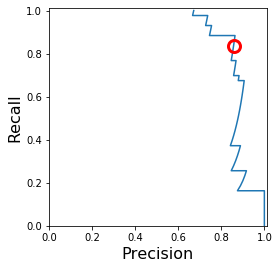

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

/home/jab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


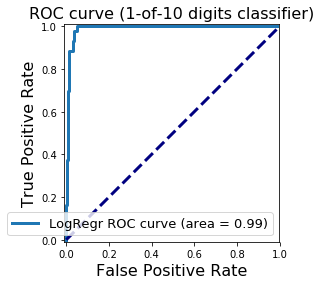

In [19]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


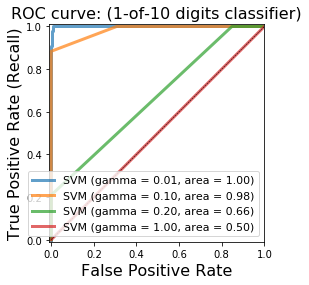

In [20]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

The multi-class confusion matrix is a straightforward extension of the binary
classifier two by two confusion matrix.
For example, in our digits data set, there are ten classes for
the digits, zero through nine.
So, the ten class confusion matrix is a ten by ten matrix with the true digit
class indexed by row and the predicted digit class indexed by column.
As with the two by two case, the correct prediction is by the classifier where
the true class matches the predicted class are all along the diagonal and
misclassifications are off the diagonal. 

So as a general rule of thumb as part of model evaluation,
I suggest always looking at the confusion matrix for your classifier.
To get some insight into what kind of errors it is making for
each class including whether some classes are much more prone to certain kinds of
errors than others. 

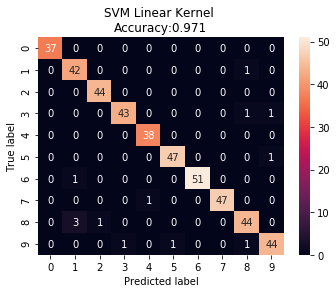

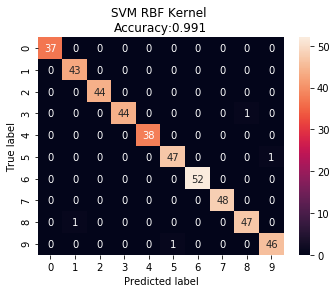

In [21]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [22]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

In [23]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [24]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


### Regression evaluation metrics

In practice though it turns out that for most applications of regression,
distinguishing between these types of different errors is not as important.
This simplifies evaluation for regression quite a bit.
In most cases, the default r squared score that's available for regression and
psychic learn and that summarizes how well future instances will be predicted.
It's adequate for most tasks.
As a reminder, the r2_score for perfect predictor is 1.0.
And for a predictor that always output the same constant value, the r2_score is 0.0.
The r2_score despite the squared in the name that suggests
it's always positive does have the potential to go negative for
bad model fits, such as when fitting non-linear functions to data. 


There are a few alternative regression devaluation metrics
you should be aware of that work differently than the r2_score.
Mean absolute error takes the mean absolute difference between the target and
predicted values.
In machine running terms this corresponds to the expected value of L1 norm laws.
This is sometimes used for example to asses focused outcomes for
regression in time series analysis.
Mean squared error takes the mean squared difference between the target and
predicted values and this corresponds to the expected value of the L2 norm loss.
This is widely used for many regression problems and
larger errors have correspondingly larger squared contributions to the mean error.
Like mean absolute error, mean squared error doesn't distinguish between over and
under estimates. 

Finally one situation that does arise quite often,
is the existence of outliers in the data,
which can have unwanted influence on the overall r squared or median squared value.
So in those cases, when ignoring outlier is important,
you can use the median_absolute_error score, which is robust with the presence of
outliers because it uses the median of the error distribution rather than the median. 

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


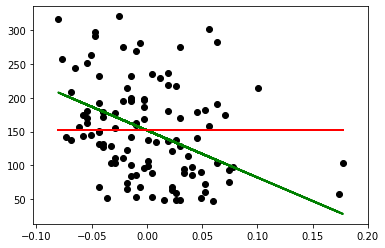

In [28]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

### Model selection using evaluation metrics

Now that you've seen a number of different evaluation metrics
for both binary and multiclass classification,
let's take a look at how you can apply them as criteria for
selecting the best classifier for your application,
otherwise known as model selection.
In previous lectures we've seen a number of
different evaluation frameworks for potential model selection.
First, we simply did training and testing on the same dataset,
which as we well know,
typically overfits badly and doesn't generalize well to new data.
As a side note however,
it can serve as a useful sanity check to make sure
your software engineering and feature generation pipeline is working correctly.
Second, we frequently use
the single train-test split to produce a single evaluation metric.
While fast and easy,
this doesn't give as realistic a set of
estimates for how well the model may work on future, new data.
And we don't get a good picture for the variance in the evaluation metrics that may
result as we do prediction on different test sets.
Third, we used k-fold cross-validation to create K random train-test splits,
where the evaluation metric was averaged across splits.
This leads to models that are more reliable on unseen data.
In particular, we can also use grid search using for
example the GridSearchCV method within each cross-validation fold,
to find optimal parameters for a model with respect to the evaluation metric.
The default evaluation metric used for a cross-val score or GridSearchCV is accuracy.
So how do you apply the new metrics you've learned about here like
AUC in model selection?
Scikit-learn makes this very easy.
You simply add a scoring parameter that's set to
the string with the name of the evaluation metric you want to use.
Let's first look at an example using the scoring parameter for cross-validation,
and then we'll take a look at the other primary method of model selection, grid search.
In the notebook here we have a cross-validation example where we're running
five folds using a support vector classifier
with a linear kernel and C parameter set to one. 

#### Cross-validation example

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


#### Evaluation metrics supported for model selection

In [31]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


/home/jab/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5442641930914242
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5575562075054573
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8963140230963693


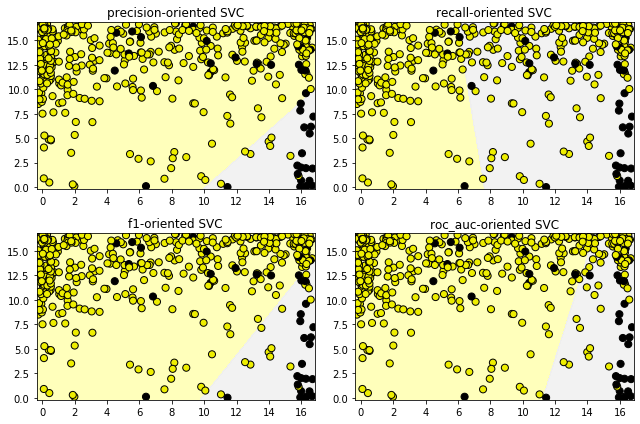

In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

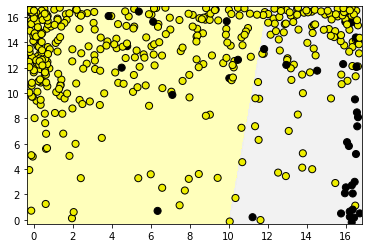

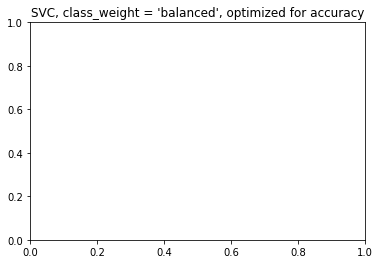

/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


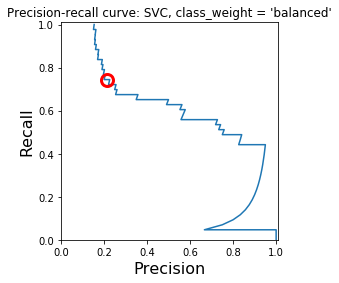

At zero threshold, precision: 0.22, recall: 0.74


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))